In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
data = fetch_openml("mnist_784", version=1)
print(data)

/Users/tugbakayhan/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ..

In [2]:
x, y = data["data"], data["target"]
print(x.shape)

(70000, 784)


In [3]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2,
                                                random_state=42)

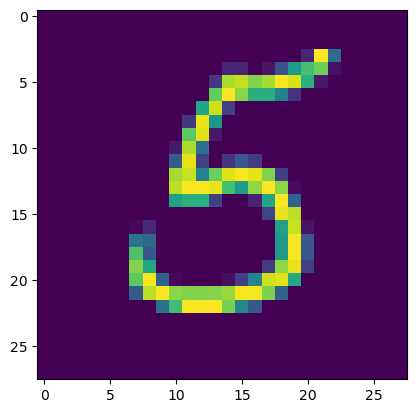

In [4]:
image = np.array(xtrain.iloc[0]).reshape(28, 28)
plt.imshow(image)

In [5]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier()
model.fit(xtrain, ytrain)

SGDClassifier()

In [6]:
predictions = model.predict(xtest)
print(predictions)

['8' '4' '8' ... '2' '7' '1']


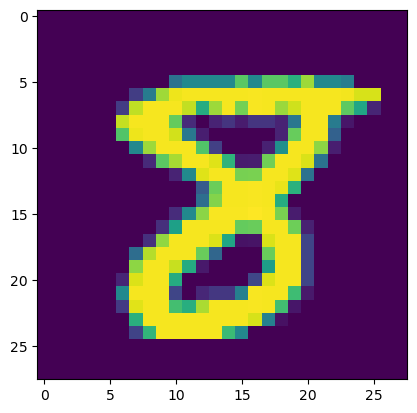

In [7]:
image = np.array(xtest.iloc[0]).reshape(28, 28)
plt.imshow(image)

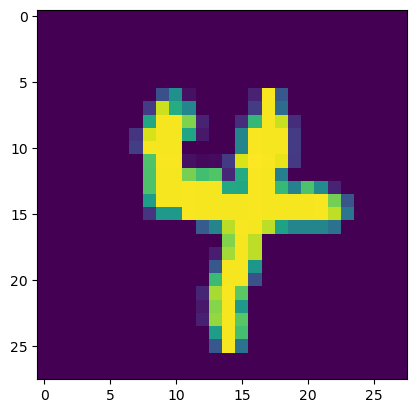

In [8]:
image = np.array(xtest.iloc[1]).reshape(28, 28)
plt.imshow(image)

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# MNIST veri kümesini yükleme
mnist = fetch_openml('mnist_784', version=1)

# Verileri ve etiketleri ayırma
x, y = mnist["data"], mnist["target"]

# Verileri normalize etme
x = x / 255.0

# Verileri eğitim ve test kümelerine ayırma
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# DataFrame'leri NumPy dizilerine dönüştürme
xtrain = np.array(xtrain).reshape(-1, 28, 28, 1)
xtest = np.array(xtest).reshape(-1, 28, 28, 1)

# Modeli oluşturma
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Modeli derleme
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Modeli eğitme
model.fit(xtrain, ytrain, epochs=5, batch_size=64)

# Modeli değerlendirme
test_loss, test_acc = model.evaluate(xtest, ytest)
print('Test accuracy:', test_acc)









/Users/tugbakayhan/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Epoch 1/5


2024-02-24 17:42:07.235239: W tensorflow/core/framework/op_kernel.cc:1816] OP_REQUIRES failed at cast_op.cc:122 : UNIMPLEMENTED: Cast string to float is not supported


UnimplementedError: Graph execution error:

Detected at node Cast_1 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/Users/tugbakayhan/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/Users/tugbakayhan/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/Users/tugbakayhan/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 711, in start

  File "/Users/tugbakayhan/anaconda3/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/Users/tugbakayhan/anaconda3/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/Users/tugbakayhan/anaconda3/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/Users/tugbakayhan/anaconda3/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/Users/tugbakayhan/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue

  File "/Users/tugbakayhan/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 499, in process_one

  File "/Users/tugbakayhan/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell

  File "/Users/tugbakayhan/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 729, in execute_request

  File "/Users/tugbakayhan/anaconda3/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 411, in do_execute

  File "/Users/tugbakayhan/anaconda3/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 531, in run_cell

  File "/Users/tugbakayhan/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3006, in run_cell

  File "/Users/tugbakayhan/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3061, in _run_cell

  File "/Users/tugbakayhan/anaconda3/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/Users/tugbakayhan/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3266, in run_cell_async

  File "/Users/tugbakayhan/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3445, in run_ast_nodes

  File "/Users/tugbakayhan/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code

  File "/var/folders/j8/f23r7m5n62l6j13r9vn5pvxc0000gn/T/ipykernel_59880/66969339.py", line 39, in <module>

  File "/Users/tugbakayhan/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/Users/tugbakayhan/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/Users/tugbakayhan/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/Users/tugbakayhan/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/Users/tugbakayhan/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/Users/tugbakayhan/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1155, in train_step

  File "/Users/tugbakayhan/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1249, in compute_metrics

  File "/Users/tugbakayhan/anaconda3/lib/python3.11/site-packages/keras/src/engine/compile_utils.py", line 620, in update_state

  File "/Users/tugbakayhan/anaconda3/lib/python3.11/site-packages/keras/src/utils/metrics_utils.py", line 77, in decorated

  File "/Users/tugbakayhan/anaconda3/lib/python3.11/site-packages/keras/src/metrics/base_metric.py", line 140, in update_state_fn

  File "/Users/tugbakayhan/anaconda3/lib/python3.11/site-packages/keras/src/metrics/base_metric.py", line 708, in update_state

Cast string to float is not supported
	 [[{{node Cast_1}}]] [Op:__inference_train_function_879]